In [1]:
import piplite
await piplite.install(['numpy','pandas','seaborn', 'matplotlib'])

In [2]:
import pandas as pd,numpy as np,requests as rq

In [3]:
url='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/iris_data.csv'
res=rq.get(url)
with open('iris_data.csv','wb')as f:
    f.write(res.content)

/lib/python3.11/site-packages/urllib3/connectionpool.py:1101: InsecureRequestWarning: Unverified HTTPS request is being made to host 'cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


In [4]:
df=pd.read_csv('iris_data.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
df.loc[:,'species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

In [9]:
print(df.shape)
print(df.columns)
print(df.dtypes)

(150, 5)
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object


In [37]:
df_stat=df.describe()
df_stat

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [38]:
df_stat.loc['range']=df_stat.loc['max']-df_stat.loc['min']

In [41]:
df_stat.rename(index={'50%':'median'},inplace=True)

In [42]:
df_stat.head(10)

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
median,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000
range,3.600000,2.400000,5.900000,2.400000


In [43]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.418,1.464,0.244
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [44]:
df.groupby('species').median()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.0,3.4,1.50,0.2
versicolor,5.9,2.8,4.35,1.3
virginica,6.5,3.0,5.55,2.0


In [50]:
df.groupby('species').agg(['mean', 'median']) 
#df.groupby('species').agg([np.mean,np.median])

sepal_length        sepal_width        petal_length         \
                   mean median        mean median         mean median   
species                                                                 
setosa            5.006    5.0       3.418    3.4        1.464   1.50   
versicolor        5.936    5.9       2.770    2.8        4.260   4.35   
virginica         6.588    6.5       2.974    3.0        5.552   5.55   

           petal_width         
                  mean median  
species                        
setosa           0.244    0.2  
versicolor       1.326    1.3  
virginica        2.026    2.0

In [54]:
agg_dic={f:['mean','median'] for f in df.columns if f!='species'}
agg_dic['petal_length']='max'
print(agg_dic)
df.groupby('species').agg(agg_dic)

{'sepal_length': ['mean', 'median'], 'sepal_width': ['mean', 'median'], 'petal_length': 'max', 'petal_width': ['mean', 'median']}


sepal_length        sepal_width        petal_length petal_width  \
                   mean median        mean median          max        mean   
species                                                                      
setosa            5.006    5.0       3.418    3.4          1.9       0.244   
versicolor        5.936    5.9       2.770    2.8          5.1       1.326   
virginica         6.588    6.5       2.974    3.0          6.9       2.026   

                   
           median  
species            
setosa        0.2  
versicolor    1.3  
virginica     2.0

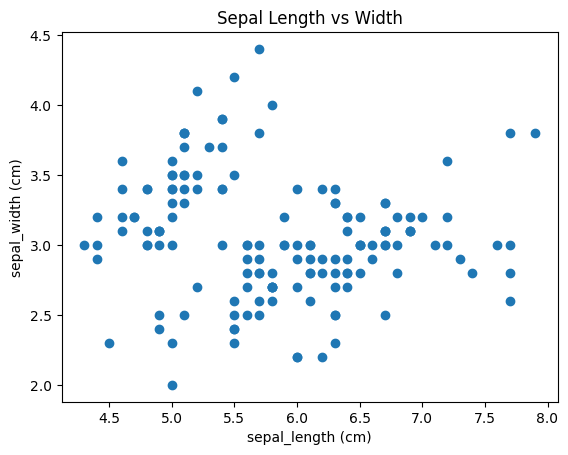

In [58]:
import matplotlib.pyplot as plt
ax=plt.axes()
ax.scatter(df.sepal_length,df.sepal_width)
ax.set(xlabel='sepal_length (cm)',ylabel='sepal_width (cm)',
      title='Sepal Length vs Width')
plt.show()

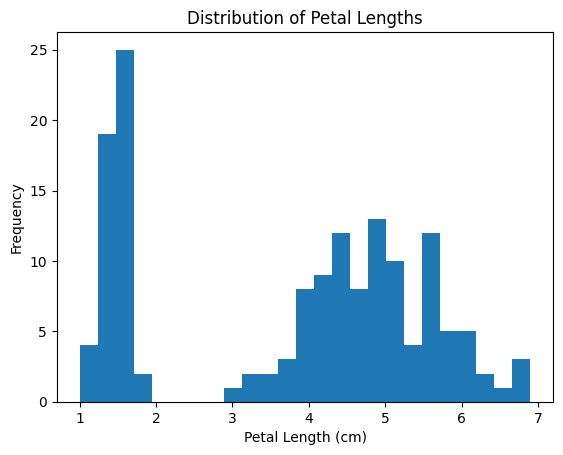

In [63]:
ax=plt.axes()
ax.hist(df.petal_length,bins=25)
ax.set(xlabel='Petal Length (cm)', 
       ylabel='Frequency',
       title='Distribution of Petal Lengths')
plt.show()

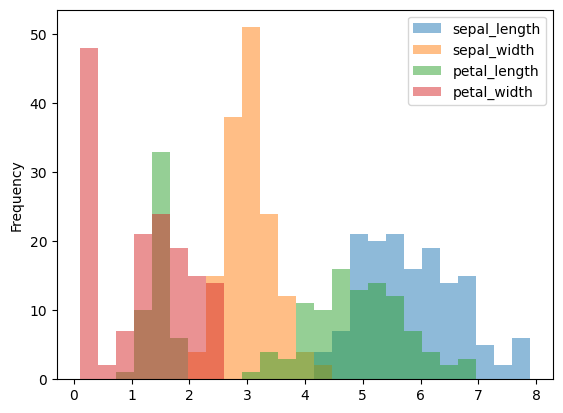

In [66]:
df.plot.hist(bins=25,alpha=0.5)
plt.show()

<ipython-input-75-e0df853f6ab8>:4: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
<ipython-input-75-e0df853f6ab8>:6: MatplotlibDeprecationWarning: 
The is_last_row function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_last_row() instead.
  if ax.is_last_row():


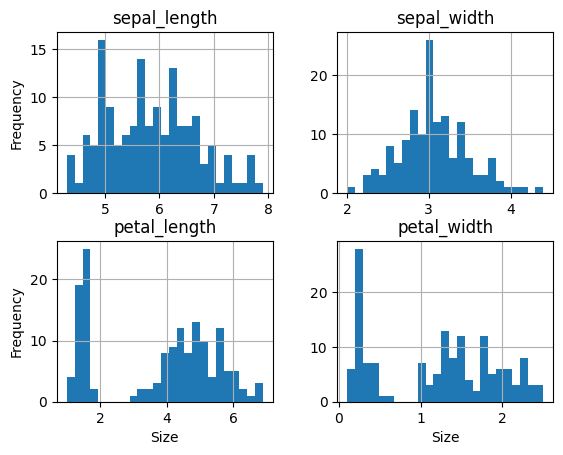

In [75]:
axl=df.hist(bins=25)

for ax in axl.flatten():
    if ax.is_first_col():
        ax.set_ylabel('Frequency')
    if ax.is_last_row():
        ax.set_xlabel('Size')

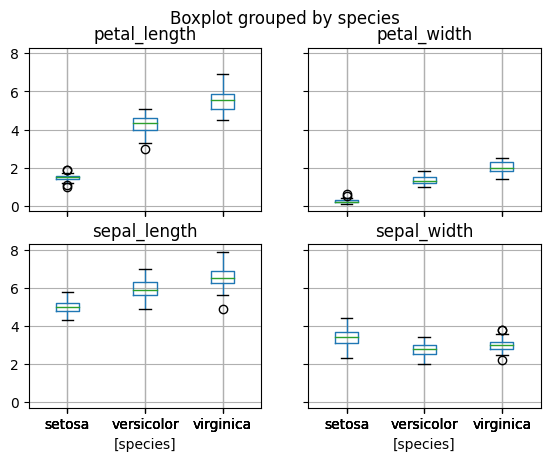

In [79]:
df.boxplot(by='species')
plt.show()

In [86]:
df_p=df.set_index('species').stack().to_frame().reset_index().rename(columns={0:'size', 'level_1':'measurement'})
df_p.head()

,species,measurement,size
0,setosa,sepal_length,5.1
1,setosa,sepal_width,3.5
2,setosa,petal_length,1.4
3,setosa,petal_width,0.2
4,setosa,sepal_length,4.9


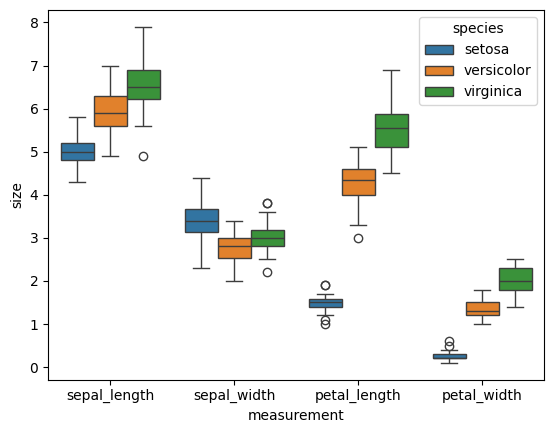

In [94]:
import seaborn as sns
sns.boxplot(x='measurement',y='size',hue='species',data=df_p)
plt.show()

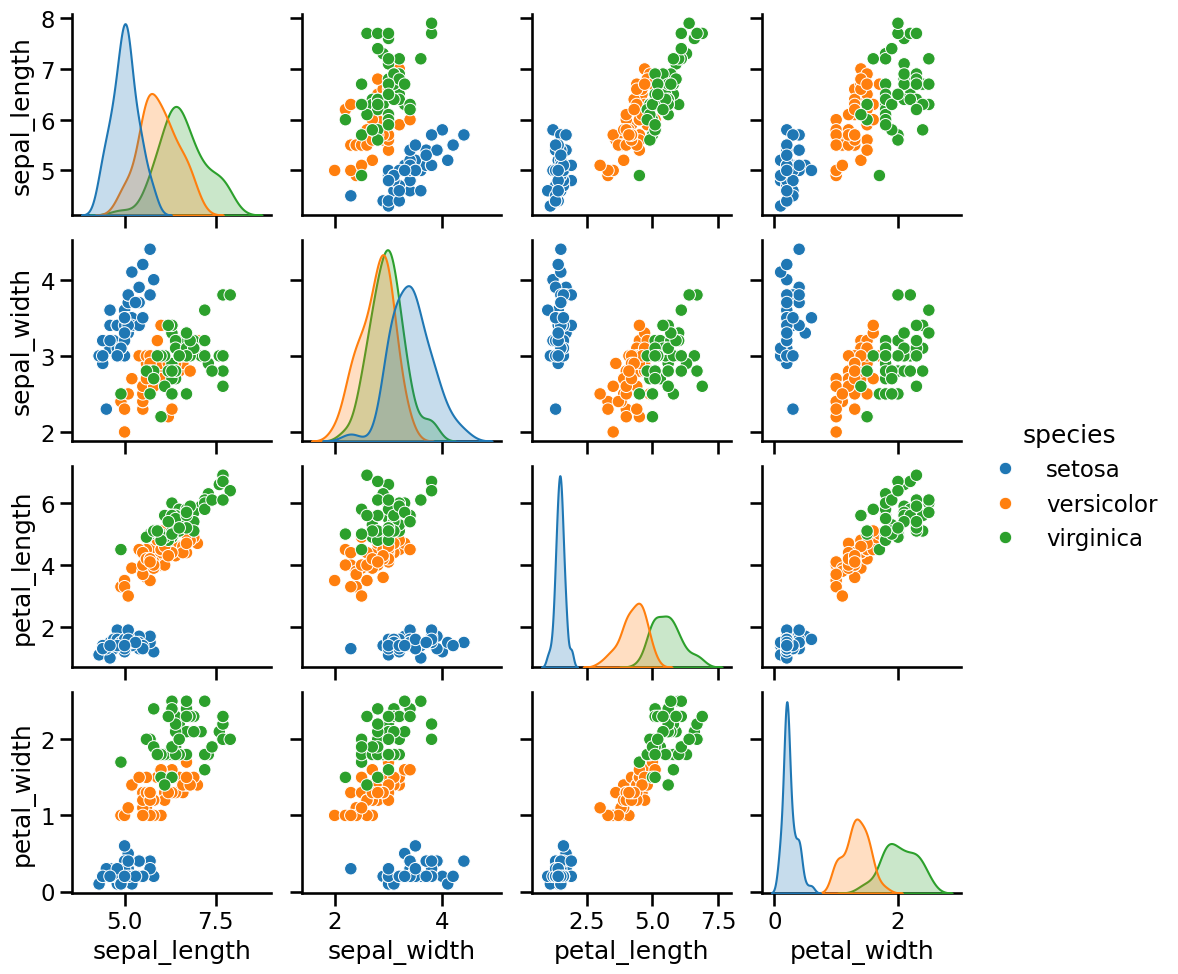

In [97]:
sns.set_context('talk')
sns.pairplot(data=df,hue='species')
plt.show()